## Sentiment analysis based on Naive Bayes with TF-IDF

In [19]:
import joblib
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [20]:
import sys
sys.path.append('../utils') 
from dataset_split_tfidf import load_and_split_data

# Load the data
X_train, X_test, y_train, y_test = load_and_split_data()


In [21]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# predict
y_pred = nb_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Save the model
joblib.dump(nb_model, './tfidf_models/nb_model.pkl')

Accuracy: 0.7049433176525025
              precision    recall  f1-score   support

    negative       0.70      0.71      0.70     19107
    positive       0.71      0.70      0.71     19794

    accuracy                           0.70     38901
   macro avg       0.70      0.70      0.70     38901
weighted avg       0.71      0.70      0.70     38901



['./tfidf_models/nb_model.pkl']

## Draw result

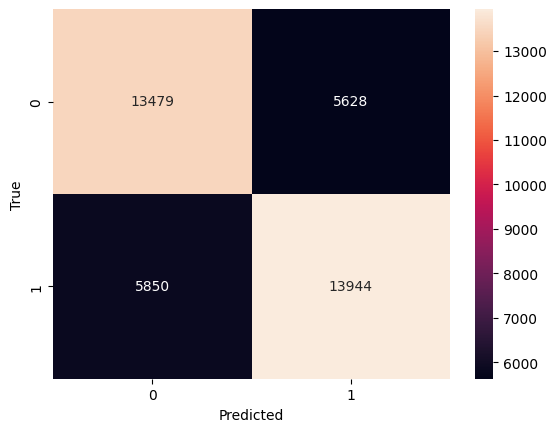

In [22]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

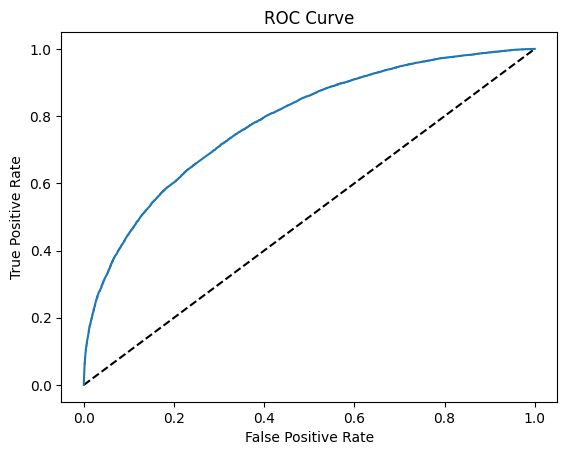

<Figure size 640x480 with 0 Axes>

In [23]:
# plot roc curve
from sklearn.metrics import roc_curve

y_pred_prob = nb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# save as png
plt.savefig('./tfidf_models/nb_roc_curve.png')